# Assignment 5 - Naive Bayes
## Problem Statement 3
In this case study, you have been given Twitter data collected from an anonymous twitter handle. With the help of a Naïve Bayes model, predict if a given tweet about a real disaster is real or fake.
1 = real tweet and 0 = fake tweet


> ## Business Problem

Business Objective:
- Predict whether a given tweet is about a real disaster or not, helping emergency services, researchers, or policymakers assess and respond effectively.

Constraints:

- Handle missing data in keyword and location.
- Process unstructured text data from the text column.

### Data Dictionary
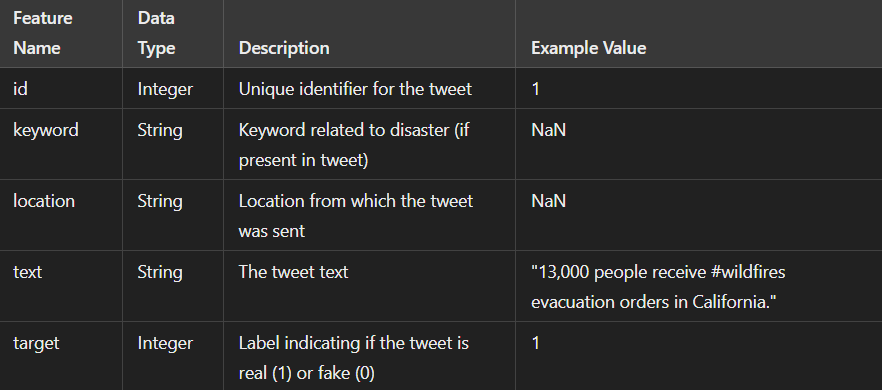

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [3]:
#Load the dataset
dataset=pd.read_csv("Disaster_tweets_NB.csv")

In [8]:
#Preprocessing
#Handle missing values
dataset['keyword']=dataset['keyword'].fillna('')
dataset['location']=dataset['location'].fillna('')

In [9]:
#Combine 'keyword', 'location', and 'text' into a single text feature
dataset['combined_text']=dataset['keyword']+' ' +dataset['location']+' ' +dataset['text']


In [10]:
#Define features and labels
X=dataset['combined_text']
y=dataset['target']

In [11]:
#Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [12]:
#Feature Extraction
vectorizer=CountVectorizer(stop_words='english')  # Convert text to numerical features
X_train_vectors=vectorizer.fit_transform(X_train)
X_test_vectors=vectorizer.transform(X_test)

In [13]:
#Train the Naïve Bayes Model
model=MultinomialNB()
model.fit(X_train_vectors, y_train)

MultinomialNB()

In [14]:
#Evaluate the Model
y_pred=model.predict(X_test_vectors)

In [15]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [16]:
#Prediction Example
example_tweets = [
    "Flooding has displaced thousands in the area.",
    "The weather today is sunny and bright."
]
example_vectors=vectorizer.transform(example_tweets)
predictions=model.predict(example_vectors)

for tweet, prediction in zip(example_tweets, predictions):
    print(f"Tweet: {tweet} | Predicted Label: {'Real' if prediction == 1 else 'Fake'}")

Tweet: Flooding has displaced thousands in the area. | Predicted Label: Real
Tweet: The weather today is sunny and bright. | Predicted Label: Fake
